<a href="https://colab.research.google.com/github/arekangel/AI_AUTH_2025_Areklakis_Aggelos/blob/main/Ml10hergasia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
df = pd.read_csv('dataset.csv')
df.head()

,number,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [32]:
cols=["number",
    "track_id",
    "artists",
    "album_name",
    "track_name",

]
df_with_cols=df[cols].copy()
df_without_cols=df.drop(columns=cols)
df_features_encoded = pd.get_dummies(
    df_without_cols,
    columns=["track_genre"],
    drop_first=False
)

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(df_features_encoded)
df_scaled = pd.DataFrame(
    X_scaled,
    columns=df_features_encoded.columns
)

In [34]:
df_scaled.describe().T[["mean", "std"]].head()

,mean,std
popularity,-2.692583e-17,1.000004
duration_ms,2.393407e-17,1.000004
explicit,9.972530e-19,1.000004
danceability,-8.875551e-16,1.000004
energy,2.333572e-16,1.000004


In [35]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
k_values = [2, 3, 5, 7, 10, 15, 20]
sse = []
for k in k_values:
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10
    )

    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)



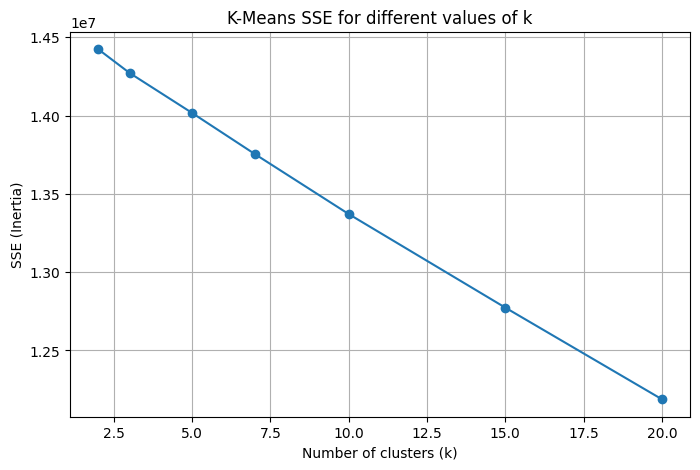

In [36]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, sse, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("SSE (Inertia)")
plt.title("K-Means SSE for different values of k")
plt.grid(True)
plt.show()

In [37]:
k_final = 10

kmeans_final = KMeans(
    n_clusters=k_final,
    random_state=42,
    n_init=10
)

clusters = kmeans_final.fit_predict(df_scaled)
df_with_cols["cluster"] = clusters

In [38]:
song_title ="Imagine"
song_idx=df_with_cols[df_with_cols["track_name"]==song_title].index[0]
song_info =df_with_cols[song_idx]
song_cluster = song_info["cluster"]

song_info

KeyError: np.int64(23309)